In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

### 6

In [2]:
X1 = 0.5

XY01 = 0.6
XY11 = 0.3

YZ0 = [0.2, 0.2, 0.6]
YZ1 = [0.1, 0.6, 0.3]

In [6]:
def generate_sequence():
    X = np.random.binomial(1, X1)
    
    if X == 0:
        Y = np.random.binomial(1, XY01)
    if X == 1:
        Y = np.random.binomial(1, XY11)
        
    if Y == 0:
        Z = np.where(np.random.multinomial(1, YZ0)==1)[0]
    if Y == 1:
        Z = np.where(np.random.multinomial(1, YZ1)==1)[0]
    return np.array([X, Y, Z])

In [8]:
n = 1000
result = np.zeros((n, 3))
print("result shape: ", result.shape)

for i in range(n):
    result[i, :] = generate_sequence()

result shape:  (1000, 3)


In [38]:
from itertools import product
r = [0,1]
s = [0, 1]
t = [0, 1, 2]

theta = {}
for (x,y,z) in product(r,s,t):
    theta[(x,y,z)] = np.sum(np.sum(result == np.array([x,y,z]), axis=1)==3)/n

$$
P(X, Y, Z) = P(X)P(Y|X)P(Z|Y)
$$

In [28]:
print("(0,0,0) in theory: %.3f, simulation: %.3f"%(0.5*0.4*0.2, theta[0,0,0]))
print("(0,0,1) in theory: %.3f, simulation: %.3f"%(0.5*0.4*0.2, theta[0,0,1]))
print("(0,0,2) in theory: %.3f, simulation: %.3f"%(0.5*0.4*0.6, theta[0,0,2]))
print("\n")
print("(0,1,0) in theory: %.3f, simulation: %.3f"%(0.5*0.6*0.1, theta[0,1,0]))
print("(0,1,1) in theory: %.3f, simulation: %.3f"%(0.5*0.6*0.6, theta[0,1,1]))
print("(0,1,2) in theory: %.3f, simulation: %.3f"%(0.5*0.6*0.3, theta[0,1,2]))
print("\n")
print("(1,0,0) in theory: %.3f, simulation: %.3f"%(0.5*0.7*0.2, theta[1,0,0]))
print("(1,0,1) in theory: %.3f, simulation: %.3f"%(0.5*0.7*0.2, theta[1,0,1]))
print("(1,0,2) in theory: %.3f, simulation: %.3f"%(0.5*0.7*0.6, theta[1,0,2]))
print("\n")
print("(1,1,0) in theory: %.3f, simulation: %.3f"%(0.5*0.3*0.1, theta[1,1,0]))
print("(1,1,1) in theory: %.3f, simulation: %.3f"%(0.5*0.3*0.6, theta[1,1,1]))
print("(1,1,2) in theory: %.3f, simulation: %.3f"%(0.5*0.3*0.3, theta[1,1,2]))

(0,0,0) in theory: 0.040, simulation: 0.033
(0,0,1) in theory: 0.040, simulation: 0.035
(0,0,2) in theory: 0.120, simulation: 0.135


(0,1,0) in theory: 0.030, simulation: 0.034
(0,1,1) in theory: 0.180, simulation: 0.183
(0,1,2) in theory: 0.090, simulation: 0.083


(1,0,0) in theory: 0.070, simulation: 0.070
(1,0,1) in theory: 0.070, simulation: 0.062
(1,0,2) in theory: 0.210, simulation: 0.218


(1,1,0) in theory: 0.015, simulation: 0.017
(1,1,1) in theory: 0.090, simulation: 0.092
(1,1,2) in theory: 0.045, simulation: 0.038


In [34]:
# Bootstrap to calculate the 95% confidence interval for twelve parameters

B = 10000
index = np.arange(n)
thetaB = np.zeros((B, 12))

for i in range(B):
    indexB = np.random.choice(index, size=n, replace=True)
    resultB = result[indexB]
    
    j = 0
    for (x,y,z) in product(r,s,t):
        thetaB[i, j] = np.sum(np.sum(resultB == np.array([x,y,z]), axis=1)==3)/n
        j+=1

In [40]:
# 95% interval

j = 0
for (x,y,z) in product(r,s,t):
    the = thetaB[:, j]
    print('95 percent interval for (%d, %d, %d) is (%.3f, %.3f), theory: %.3f'%(x, y, z, 
                                                                  np.percentile(the, 2.5), 
                                                                  np.percentile(the, 97.5), theta[(x,y,z)]))
    j += 1

95 percent interval for (0, 0, 0) is (0.023, 0.044), theory: 0.033
95 percent interval for (0, 0, 1) is (0.024, 0.046), theory: 0.035
95 percent interval for (0, 0, 2) is (0.114, 0.157), theory: 0.135
95 percent interval for (0, 1, 0) is (0.023, 0.046), theory: 0.034
95 percent interval for (0, 1, 1) is (0.159, 0.207), theory: 0.183
95 percent interval for (0, 1, 2) is (0.066, 0.101), theory: 0.083
95 percent interval for (1, 0, 0) is (0.055, 0.086), theory: 0.070
95 percent interval for (1, 0, 1) is (0.047, 0.077), theory: 0.062
95 percent interval for (1, 0, 2) is (0.192, 0.244), theory: 0.218
95 percent interval for (1, 1, 0) is (0.010, 0.025), theory: 0.017
95 percent interval for (1, 1, 1) is (0.074, 0.110), theory: 0.092
95 percent interval for (1, 1, 2) is (0.027, 0.050), theory: 0.038


### 7

#### (a)

$$
P = f(X)f(Z_1)f(Z_2)f(Z_3)f(Z_4)f(Y_1|X, Z_1)f(Y_2|X, Z_2)f(Y_3|X, Z_3)f(Y_4|X, Z_4)
$$

#### (b)

Without loss of generality, let's consider $Z_1$
$$
f(X, Z_1) = \int f(X)f(Z_1)f(Z_2)f(Z_3)f(Z_4)f(Y_1|X, Z_1)f(Y_2|X, Z_2)f(Y_3|X, Z_3)f(Y_4|X, Z_4) dY_1dY_2dY_3dY_4dZ_2dZ_3dZ_4
$$

Since we have $\int f(Z_2)f(Y_2|X, Z_2)dZ_2dY_2 = 1$, above equation can be simplified to 
$$
f(X, Z_1) = f(X)f(Z_1)
$$

### 8

#### (a)

$$
P(Z=1|Y=1) = \frac{e^2}{1+e^2}\left(\frac{1}{2} + \frac{e^2}{1+e^2} \right)
$$

#### (b)

In [42]:
def generate_sequence():
    X = np.random.binomial(1, 0.5)
    tx = np.exp(4*X -2)
    Y = np.random.binomial(1, tx/(1+tx))
    ty = np.exp(2*(X+Y)-2)
    Z = np.random.binomial(1, ty/(1+ty))
    
    return np.array([X, Y, Z])

def generate_samples(n):
    result = np.zeros((n, 3))
    for i in range(n):
        result[i,:]= generate_sequence()
    return result

In [56]:
NS = [100, 500, 1000, 2000, 5000, 7000, 10000, 20000, 50000, 100000]
pzy = []
for n in NS:
    result = generate_samples(n)
    result_Y1 = result[result[:, 1]==1]
    pzy_n = np.sum(result_Y1[:, 2] == 1)/result_Y1.shape[0]
    pzy.append(pzy_n)

In [55]:
pzy_theory = (np.exp(2)/(np.exp(2)+1))**2 + 1/(np.exp(2)+1) * 0.5
print(pzy_theory)

0.835404953585


Text(0,0.5,'P(Z=1|Y=1)')

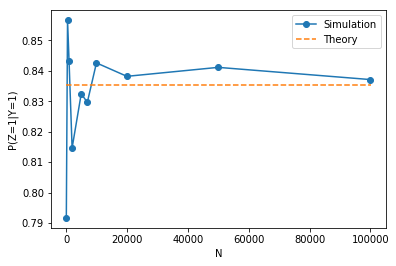

In [62]:
plt.plot(NS, pzy, '-o', label="Simulation")
plt.plot([50, 100050], [pzy_theory, pzy_theory], '--', label="Theory")
plt.legend()
plt.xlabel("N")
plt.ylabel("P(Z=1|Y=1)")

#### (c)

$$
f(Z=1|Y:=1) = f(X=0)f(Z=1|X=0, Y=1) + f(X=1)f(Z=1|X=1, Y=1) = \frac{1}{4} + \frac{1}{2} \cdot \frac{e^2}{1+e^2}
$$

#### (d)

In [63]:
def generate_y():
    X = np.random.binomial(1, 1/2)
    tz = np.exp(2*(X+1)-2)
    Z = np.random.binomial(1, tz/(1+tz))
    return np.array([X, Z])

def generate_samples_y(n):
    result = np.zeros((n, 2))
    for i in range(n):
        result[i,:]= generate_y()
    return result

In [69]:
NS = [100, 500, 1000, 2000, 5000, 7000, 10000, 20000, 50000, 100000]
pz_sety = []
for n in NS:
    result = generate_samples_y(n)
    pz_sety_n = np.sum(result[:, 1] == 1)/result.shape[0]
    pz_sety.append(pz_sety_n)

In [65]:
pz_sety_theory = 1/4 + 1/2*np.exp(2)/(1+np.exp(2))
print(pz_sety_theory)

0.690398538989


Text(0,0.5,'P(Z=1|Y:=1)')

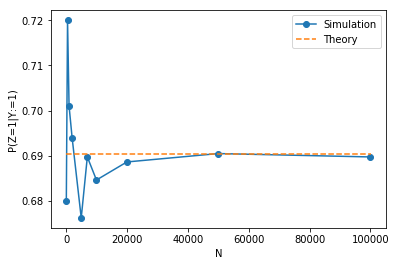

In [70]:
plt.plot(NS, pz_sety, '-o', label="Simulation")
plt.plot([50, 100050], [pz_sety_theory, pz_sety_theory], '--', label="Theory")
plt.legend()
plt.xlabel("N")
plt.ylabel("P(Z=1|Y:=1)")